In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
npts=2**24
fs_DAC=100e6
f_analog=2**26 # pour avoir des dB.Hz dans les plots de bruit
Nmux=34
f_row=6.25e6
t_row=1/f_row
t_frame=t_row*Nmux
f_frame=1/t_frame

In [3]:
t=np.arange(npts)/f_analog
f=np.arange(npts/2)*f_analog/npts
fsig=1e3
sig_sine=np.sin(2*np.pi*fsig*t)

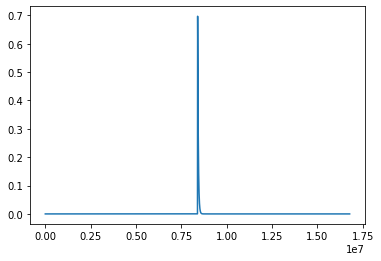

In [4]:
t_rise=50e-6
t_fall=500e-6
nb_slices=1
t_pulse=np.arange(int(npts/nb_slices))/f_analog
i_offset=int(npts/nb_slices/2)
pulse=-np.exp(-t_pulse/t_rise)+np.exp(-t_pulse/t_fall)
pulse=np.concatenate((np.zeros(i_offset),pulse[:i_offset]))
#plt.plot(t_pulse, pulse)
sig_pulse=np.tile(pulse,nb_slices)
plt.plot(sig_pulse)

In [31]:
def plot_spectra(f, sig_in, title, figname, ymindb=-400):
    from numpy.fft import rfft

    sig_f=np.abs(rfft(sig_in*np.blackman(len(sig_in))))

    sig_f_dB=-1*np.ones(len(sig_f))*np.inf
    i_good=np.where(sig_f > 0)[0]
    sig_f_dB[i_good]=20*np.log10(sig_f[i_good])
    sig_f_dB-=sig_f_dB.max()
    
    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot(2, 1, 1)
    #ax1.plot(f/1e6,sig_f_dB[:-1])

    ax1.semilogx(f/1e6,sig_f_dB[:-1])

    ax1.set_title(title)
    ax1.set_ylabel('Amplitude (dB.Hz)')
    ax1.set_ylim(ymindb,10)
    ax1.grid()

    ax2 = fig.add_subplot(2, 1, 2)
    #ax2.plot(f/1e6,sig_f_dB[:-1])

    ax2.semilogx(f/1e6,sig_f_dB[:-1])

    ax2.set_xlim(1e-6,0.01)
    ax2.set_ylim(ymindb,10)

    ax2.set_ylabel('Amplitude (dB.Hz)')
    ax2.set_xlabel('Frequency (MHz)')
    ax2.grid()

    fig.tight_layout()
    plt.savefig(figname+'.jpg', dpi=400, bbox_inches='tight')

In [32]:
# quantification
def quantification(sig, nbits):
    return(np.round(sig*2**nbits/(sig.max()-sig.min())))

In [33]:
# sampling at f_row
def sampling(sig, t_samp):
    sig_samp=np.zeros(npts)
    l_samp=int(t_samp*f_analog/1)
    for i in range(int(npts/l_samp)):
        sig_samp[i*l_samp:(i+1)*l_samp]=np.repeat(sig[i*l_samp], l_samp)
    return(sig_samp)

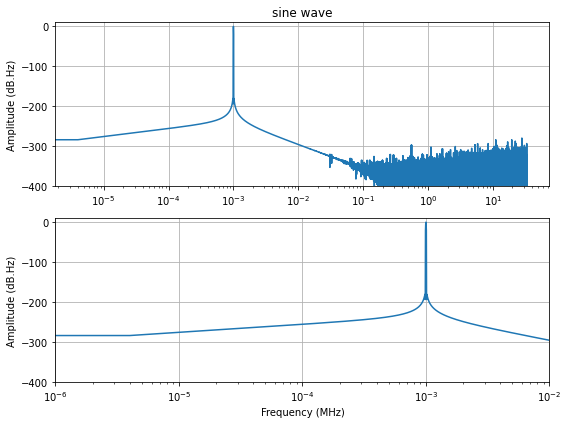

In [34]:
plot_spectra(f, sig_sine, 'sine wave', 'sine_original')

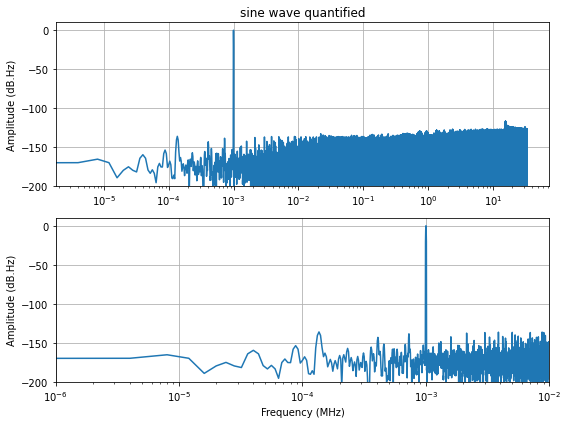

In [24]:
sig_quant=quantification(sig_sine, 14)
plot_spectra(f, sig_quant, 'sine wave quantified', 'sine_quant14', -200)

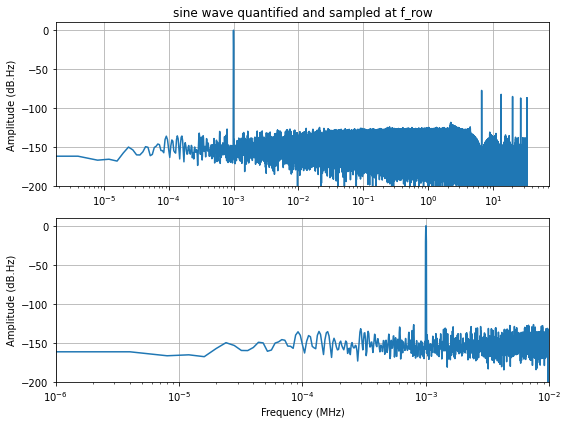

In [25]:
# sampling at F_row
sig_quant_sampled=sampling(sig_quant, t_row)
plot_spectra(f, sig_quant_sampled, 'sine wave quantified and sampled at f_row', 'sine_quant14_frow',-200)

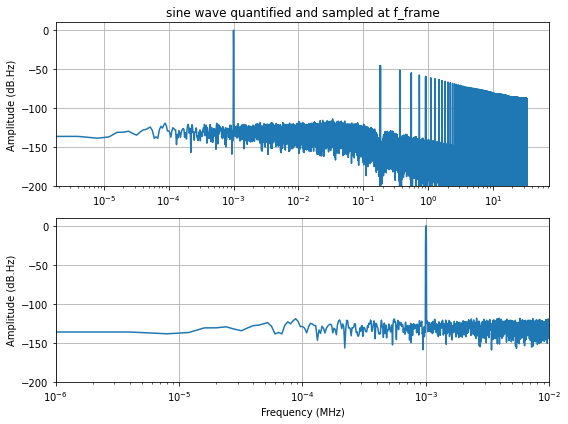

In [26]:
# sampling at F_frame
sig_quant_sampled=sampling(sig_quant, t_frame)
plot_spectra(f, sig_quant_sampled, 'sine wave quantified and sampled at f_frame', 'sine_quant14_frame', -200)

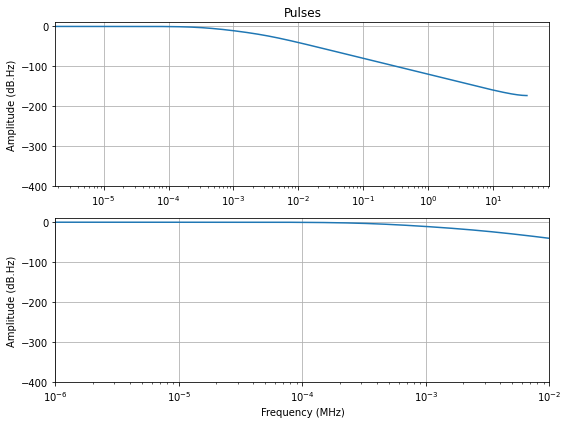

In [27]:
plot_spectra(f, sig_pulse, 'Pulses', 'pulse_original')

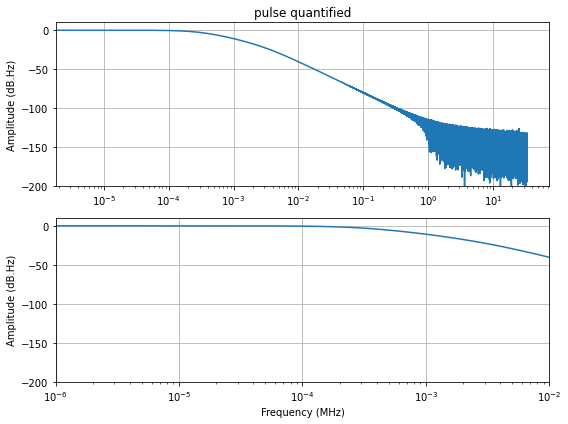

In [28]:
sig_quant=quantification(sig_pulse, 14)
plot_spectra(f, sig_quant, 'pulse quantified', 'pulse_quant14', -200)

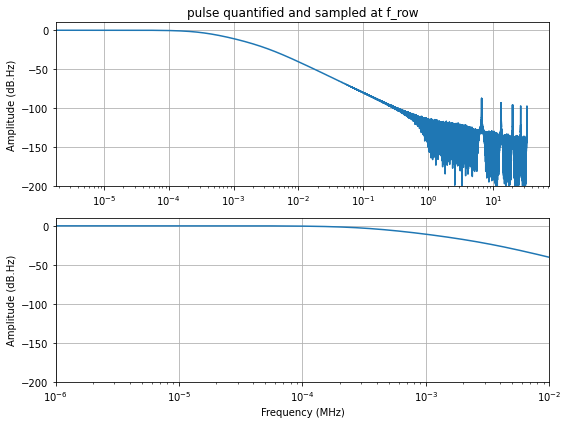

In [29]:
# sampling at F_row
sig_quant_sampled=sampling(sig_quant, t_row)
plot_spectra(f, sig_quant_sampled, 'pulse quantified and sampled at f_row', 'pulse_quant14_frow',-200)

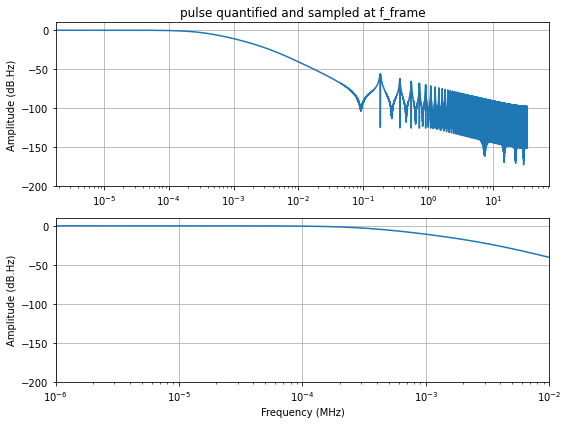

In [30]:
# sampling at F_frame
sig_quant_sampled=sampling(sig_quant, t_frame)
plot_spectra(f, sig_quant_sampled, 'pulse quantified and sampled at f_frame', 'pulse_quant14_frame', -200)